In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import scipy
from PIL import Image
from scipy import ndimage
import gdal
import os
import geopandas as gpd
from skimage import io
from skimage.io import imread
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\Lenovo\anaconda3\envs\env_1\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# reading the masked tif images and forming a dataset.

In [4]:
path = ["E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I1B1.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I1B2.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I1B3.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I1B4.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I1B5.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I2B1.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I2B2.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I2B3.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I2B4.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I2B5.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I3B1.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I3B2.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I3B3.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I3B4.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I3B5.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I4B1.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I4B2.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I4B3.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I4B4.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I4B5.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I5B1.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I5B2.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I5B3.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I5B4.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I5B5.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I6B1.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I6B2.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I6B3.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I6B4.tif",
       "E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\Masked_images\\I6B5.tif"]

In [5]:
I1B1 = gdal.Open(path[0])
I1B1

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000183157FBD50> >

In [6]:
I1B1.RasterYSize, I1B1.RasterXSize, I1B1.RasterCount

(8963, 8298, 1)

In [7]:
I1B1_array = I1B1.GetRasterBand(1).ReadAsArray()
I1B1_array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [8]:
np.count_nonzero(np.isnan(I1B1_array)), np.count_nonzero(~np.isnan(I1B1_array))

(40574909, 33800065)

# as there is not enough memmory to store the array, we would take a sample from the total test data of 1%, that will be 1% of 33800065 = 338000

# creating an array which only consists the non-nan values indices

In [9]:
# I1B1_nan_index = np.argwhere(np.isnan(I1B1))

I1B1_non_nan_index = np.argwhere(~np.isnan(I1B1_array))

In [10]:
I1B1_non_nan_index

array([[   0, 5738],
       [   0, 5739],
       [   0, 5740],
       ...,
       [8962, 5788],
       [8962, 5789],
       [8962, 5790]], dtype=int64)

In [11]:
I1B1_array[0, 5738], I1B1_array[0, 5739], I1B1_array[8962, 5789], I1B1_array[8962, 5790]

(1249.0, 1242.0, 1248.0, 1237.0)

In [12]:
I1B1_non_nan_index.shape

(33800065, 2)

# now randomly selecting 338000 indices (1% of 33800065) from I1B1_non_nan_index

In [13]:
a = np.arange(I1B1_non_nan_index.shape[0])
a

array([       0,        1,        2, ..., 33800062, 33800063, 33800064])

In [14]:
a_rand = np.random.choice(a, 338000)
a_rand

array([ 6762380,   491263, 13419401, ..., 11629326, 26345455, 31836365])

In [15]:
I1B1_non_nan_rand_index = I1B1_non_nan_index[a_rand, :]
I1B1_non_nan_rand_index

array([[2643, 3574],
       [ 767, 4965],
       [3732, 6427],
       ...,
       [3434, 3074],
       [5842, 4036],
       [6873, 4799]], dtype=int64)

In [16]:
I1B1_non_nan_rand_index.shape

(338000, 2)

# we have randomly sampled indices now we will make the sample dataset using this indices

In [17]:
test_x_sample = np.zeros((1, 338000))

In [18]:
for p in path:
    print(p)
    
    image = gdal.Open(p)
    
    image_array = image.GetRasterBand(1).ReadAsArray()
    print(image_array.shape)
    sample = []
    
    for i in range(I1B1_non_nan_rand_index.shape[0]):
        sample.append(image_array[I1B1_non_nan_rand_index[i,0], I1B1_non_nan_rand_index[i,1]])
        
    sample = np.array(sample)
    
    sample = sample.reshape(1, 338000)
        
    test_x_sample = np.concatenate((sample, test_x_sample), axis = 0)
    
    print(test_x_sample.shape)
    
    print("***************")
    

E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B1.tif
(8963, 8298)
(2, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B2.tif
(8963, 8298)
(3, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B3.tif
(8963, 8298)
(4, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B4.tif
(8963, 8298)
(5, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B5.tif
(8963, 8298)
(6, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B1.tif
(8963, 8298)
(7, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B2.tif
(8963, 8298)
(8, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B3.tif
(8963, 8298)
(9, 338000)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B4.tif
(8963,

In [19]:
test_x_sample = test_x_sample[:30, :]

In [20]:
test_x_sample = test_x_sample.T

In [21]:
test_x_sample.shape

(338000, 30)

# we have our sampled test data, we will apply K-means unsupervised algorithm on this and capture details

# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

# reference for the below mentioned code

In [22]:
wcss = []

In [23]:
for i in range(1, 6):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    print("1", i)
    kmeans.fit(test_x_sample)
    print("2", i)
    wcss.append(kmeans.inertia_)
    print("3", i)

1 1
2 1
3 1
1 2
2 2
3 2
1 3
2 3
3 3
1 4
2 4
3 4
1 5
2 5
3 5


In [24]:
wcss

[6591971826692.232,
 1957669496568.6484,
 1204082734984.0256,
 919130051137.1649,
 791142640342.2151]

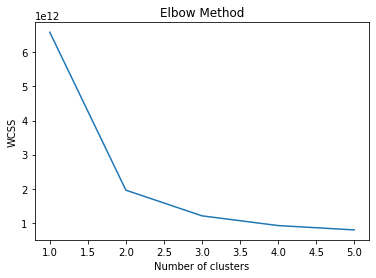

In [25]:
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
test_y_sample = kmeans.fit_predict(test_x_sample)

In [23]:
np.unique(test_y_sample)

array([0, 1])

In [24]:
test_y_sample.shape, test_x_sample.shape

((338000,), (338000, 30))

# now we will use this random sample test_x_sample and its prediction test_y_sample as training data and develop a model, once we have that trained model, we will use it to test for the remaining non-nan indices of the input images

# preparing the train data and cv data spliting in ratio 99/1

In [25]:
test_y_sample = test_y_sample.reshape(338000, 1)
test_y_sample.shape

(338000, 1)

In [26]:
train = np.concatenate((test_x_sample, test_y_sample), axis = 1)
train.shape

(338000, 31)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

In [28]:
cv_size = 1/99

train_1, cv = train_test_split(train, test_size = cv_size)

In [29]:
train_1.shape, cv.shape

((334585, 31), (3415, 31))

In [30]:
train_2 = train_1.copy()

In [31]:
train_x = train_1[:, :30]
train_y = train_1[:, 30:]

cv_x = cv[:, :30]
cv_y = cv[:, 30:]

train_x.shape, train_y.shape, cv_x.shape, cv_y.shape

((334585, 30), (334585, 1), (3415, 30), (3415, 1))

In [32]:
train_y = train_y.astype("int")
cv_y = cv_y.astype("int")

In [33]:
train_x = train_x.T
train_y = train_y.T

cv_x = cv_x.T
cv_y = cv_y.T

train_x.shape, train_y.shape, cv_x.shape, cv_y.shape

((30, 334585), (1, 334585), (30, 3415), (1, 3415))

# feature normalizing

In [34]:
for i in range(train_x.shape[0]):
    averg = np.mean(train_x[i, :])
    std_dev = np.std(train_x[i, :])
    #print(train_x[i, :])
    #print(a," : ", b ,"\n")
    train_x[i, :] = (train_x[i, :] - averg) / std_dev
    cv_x[i, :] = (cv_x[i, :] - averg) / std_dev
    #test_x[i, :] = (test_x[i, :] - averg) / std_dev

# training the model on train data and then evaluting it on cv data

In [35]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [36]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [37]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)                                           # compute activation
    cost = -1 / m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum((A - Y))
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [38]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 10 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [39]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [40]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [41]:
# d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

a = model(train_x, train_y, cv_x, cv_y, num_iterations = 200, learning_rate = 0.2, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.267732
Cost after iteration 20: 0.188354
Cost after iteration 30: 0.152067
Cost after iteration 40: 0.130502
Cost after iteration 50: 0.115921
Cost after iteration 60: 0.105291
Cost after iteration 70: 0.097152
Cost after iteration 80: 0.090700
Cost after iteration 90: 0.085448
Cost after iteration 100: 0.081083
Cost after iteration 110: 0.077393
Cost after iteration 120: 0.074228
Cost after iteration 130: 0.071481
Cost after iteration 140: 0.069069
Cost after iteration 150: 0.066934
Cost after iteration 160: 0.065027
Cost after iteration 170: 0.063312
Cost after iteration 180: 0.061760
Cost after iteration 190: 0.060346
train accuracy: 99.05255764603912 %
test accuracy: 98.79941434846266 %


# preparing the test data

In [42]:
# I1B1_non_nan_index consists the indices of all non-nan points in the input image

I1B1_non_nan_index.shape

(33800065, 2)

In [66]:
# test_x = np.zeros((1, 33800065))

In [67]:
# for p in path:
#     print(p)
    
#     image = gdal.Open(p)
    
#     image_array = image.GetRasterBand(1).ReadAsArray()
#     print(image_array.shape)
#     sample = []
    
#     for i in range(I1B1_non_nan_index.shape[0]):
#         sample.append(image_array[I1B1_non_nan_index[i,0], I1B1_non_nan_index[i,1]])
        
#     sample = np.array(sample)
    
#     sample = sample.reshape(1, 33800065)
        
#     test_x = np.concatenate((sample, test_x), axis = 0)
    
#     print(test_x.shape)
    
#     print("***************")
    

E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B1.tif
(8963, 8298)
(2, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B2.tif
(8963, 8298)
(3, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B3.tif
(8963, 8298)
(4, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B4.tif
(8963, 8298)
(5, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B5.tif
(8963, 8298)
(6, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B1.tif
(8963, 8298)
(7, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B2.tif
(8963, 8298)
(8, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B3.tif
(8963, 8298)
(9, 33800065)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images

MemoryError: Unable to allocate 6.80 GiB for an array with shape (27, 33800065) and data type float64

# as it is not able to load the test set in one array we split it in 2 left and right equally

In [43]:
I1B1_array.shape

(8963, 8298)

In [44]:
I1B1_left = I1B1_array[:, :4149]
I1B1_left.shape

(8963, 4149)

In [45]:
I1B1_right = I1B1_array[:, 4149:]

In [46]:
np.count_nonzero(np.isnan(I1B1_left)), np.count_nonzero(~np.isnan(I1B1_left))

(24096612, 13090875)

# there are 13090875 pixels with non nan values in left side of the image,  extracting indices of those pixels

In [47]:
I1B1_left

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

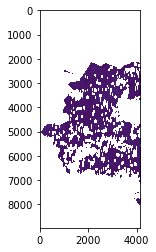

In [48]:
plt.imshow(I1B1_left)
plt.show()

In [49]:
I1B1_left_non_nan_index = np.argwhere(~np.isnan(I1B1_left))

In [50]:
I1B1_left_non_nan_index.shape

(13090875, 2)

In [51]:
I1B1_left_non_nan_index

array([[2073, 3784],
       [2073, 3785],
       [2073, 3786],
       ...,
       [8077, 4096],
       [8077, 4097],
       [8077, 4098]], dtype=int64)

In [52]:
test_x_left = np.zeros((1, 13090875))

In [53]:
for p in path:
    print(p)
    
    image = gdal.Open(p)
    
    image_array = image.GetRasterBand(1).ReadAsArray()
    print(image_array.shape)
    sample = []
    
    for i in range(I1B1_left_non_nan_index.shape[0]):
        sample.append(image_array[I1B1_left_non_nan_index[i,0], I1B1_left_non_nan_index[i,1]])
        
    sample = np.array(sample)
    
    sample = sample.reshape(1, 13090875)
        
    test_x_left = np.concatenate((sample, test_x_left), axis = 0)
    
    print(test_x_left.shape)
    
    print("***************")
    

E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B1.tif
(8963, 8298)
(2, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B2.tif
(8963, 8298)
(3, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B3.tif
(8963, 8298)
(4, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B4.tif
(8963, 8298)
(5, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B5.tif
(8963, 8298)
(6, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B1.tif
(8963, 8298)
(7, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B2.tif
(8963, 8298)
(8, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B3.tif
(8963, 8298)
(9, 13090875)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images

In [54]:
test_x_left.shape

(31, 13090875)

In [55]:
test_x_left = test_x_left[:30, :]
test_x_left.shape

(30, 13090875)

# feature normalizing on test left data

In [56]:
train_2.shape

(334585, 31)

In [57]:
train_x = train_2[:, :30]
train_x.shape

(334585, 30)

In [58]:
train_x = train_x.T

In [59]:
train_x.shape

(30, 334585)

In [60]:
train_x

array([[3759. , 3741. , 2573.5, ..., 2680.5, 3423.5, 3264.5],
       [ 866.5,  921.5, 1006.5, ..., 1096.5,  918. ,  911. ],
       [ 567.5,  666.5,  854. , ...,  716. ,  632. ,  594. ],
       ...,
       [ 885. ,  871. , 1010. , ...,  820. , 1081. ,  972. ],
       [1175. , 1161. , 1205. , ..., 1101. , 1228. , 1261. ],
       [1283. , 1193. , 1248. , ..., 1176. , 1232. , 1239. ]])

In [61]:
for i in range(train_x.shape[0]):
    averg = np.mean(train_x[i, :])
    std_dev = np.std(train_x[i, :])
    #print(train_x[i, :])
    #print(a," : ", b ,"\n")
    #train_x[i, :] = (train_x[i, :] - averg) / std_dev
    #cv_x[i, :] = (cv_x[i, :] - averg) / std_dev
    test_x_left[i, :] = (test_x_left[i, :] - averg) / std_dev

In [62]:
test_x_left

array([[ 0.33427014,  0.45430335,  0.32055206, ...,  0.03247238,
        -0.00639552,  0.02789968],
       [-0.47866188, -0.47866188, -0.47866188, ..., -0.41711629,
        -0.45404364, -0.45404364],
       [-0.35725156, -0.37018826, -0.27445666, ..., -0.34948953,
        -0.3857123 , -0.41158571],
       ...,
       [-0.45688461, -0.73791121, -0.69294696, ..., -0.55243366,
        -0.49622834, -0.3500945 ],
       [-0.29107116, -0.30106784, -0.59097181, ..., -0.3410546 ,
        -0.30106784, -0.20110096],
       [-0.75409889, -0.81406598, -0.75409889, ...,  0.1813877 ,
         0.24135478,  0.2533482 ]])

# predicting the cluster allocation of test_x_left dataset

In [63]:
for i in a:
    print("\n\n", i,"  :::  ", a[i])



 costs   :::   [0.6931471805599446, 0.2677321080647614, 0.1883542075786431, 0.15206665976317368, 0.13050221351681676, 0.11592075516822158, 0.10529082472341791, 0.09715191480129388, 0.09069950094803576, 0.08544766847232739, 0.08108293379820673, 0.07739291322960647, 0.07422820597138517, 0.07148053197653866, 0.0690694724214439, 0.06693406072594656, 0.06502725342907918, 0.06331218484000359, 0.06175956592910818, 0.06034583902272511]


 Y_prediction_test   :::   [[0. 0. 0. ... 0. 1. 1.]]


 Y_prediction_train   :::   [[0. 0. 0. ... 0. 0. 0.]]


 w   :::   [[ 0.0151659 ]
 [-0.05459016]
 [-0.04399862]
 [-0.02326798]
 [ 0.00760842]
 [ 0.0088829 ]
 [ 0.00573813]
 [ 0.00098612]
 [ 0.06631144]
 [ 0.11850101]
 [-0.02452301]
 [-0.00567501]
 [-0.01279857]
 [-0.01717399]
 [-0.03351027]
 [ 0.83701524]
 [ 0.84812621]
 [ 0.84003658]
 [ 0.81744052]
 [ 0.79130838]
 [ 0.01572274]
 [-0.01939919]
 [-0.0303058 ]
 [-0.04928187]
 [-0.0018698 ]
 [ 0.02865947]
 [-0.01805522]
 [ 0.01157781]
 [-0.00183914]
 [ 0.07

In [64]:
test_y_left = predict(a["w"], a["b"], test_x_left)

In [65]:
np.sum(test_y_left)

61.0

In [66]:
test_y_left.shape

(1, 13090875)

# now mapping these values of 0 and 1 on the result image which is the output image of 8963*8298 size, having 33800065 values among 0 and 1 and rest are corresponding to nan values

In [67]:
I1B1_left_non_nan_index.shape

(13090875, 2)

In [68]:
test_y_left = test_y_left.T

In [69]:
test_y_left.shape

(13090875, 1)

In [70]:
test_y_left = test_y_left.astype("int")

In [71]:
result_index_left = np.concatenate((I1B1_left_non_nan_index, test_y_left), axis = 1)

In [72]:
result_index_left.shape

(13090875, 3)

In [73]:
result_index_left

array([[2073, 3784,    0],
       [2073, 3785,    0],
       [2073, 3786,    0],
       ...,
       [8077, 4096,    0],
       [8077, 4097,    0],
       [8077, 4098,    0]], dtype=int64)

In [74]:
result_left = np.zeros((8963, 4149))

In [75]:
result_left[:] = 128

In [76]:
result_left = result_left.astype("int")

In [77]:
result_left

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ...,
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]])

In [78]:
for i in range(result_index_left.shape[0]):
    result_left[result_index_left[i,0], result_index_left[i,1]] = result_index_left[i, 2]

In [79]:
result_left

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ...,
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]])

In [88]:
np.unique(result_left)

array([  0, 128, 255], dtype=uint8)

In [81]:
result_left[result_left[:] == 0] = 255

In [82]:
np.unique(result_left)

array([  1, 128, 255])

In [83]:
result_left[result_left[:] == 1] = 0

In [84]:
np.unique(result_left)

array([  0, 128, 255])

In [85]:
# here 0 --> 1 during classification(minority)
# 255 --> 0 during classification(majority)
# 128 --> nan values (non-agri plus outside boundary)

In [86]:
result_left = result_left.astype("uint8")

In [87]:
io.imsave("E:\\Internship_Harvesting\\Unsupervised_Result_Image\\left.jpg", result_left)

# doing the same process on the test_x_right

In [51]:
I1B1_right

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [52]:
np.count_nonzero(np.isnan(I1B1_right)), np.count_nonzero(~np.isnan(I1B1_right))

(16478297, 20709190)

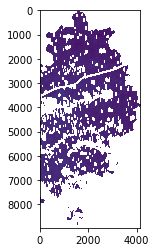

In [53]:
plt.imshow(I1B1_right)
plt.show()

In [60]:
# there are 20709190 pixels with non nan values in right side of the image,  extracting indices of those pixels

I1B1_right_non_nan_index = np.argwhere(~np.isnan(I1B1_right))

In [61]:
I1B1_right_non_nan_index.shape

(20709190, 2)

In [62]:
I1B1_right_non_nan_index

array([[   0, 1589],
       [   0, 1590],
       [   0, 1591],
       ...,
       [8962, 1639],
       [8962, 1640],
       [8962, 1641]], dtype=int64)

In [63]:
I1B1_right_non_nan_index[:, 1] = I1B1_right_non_nan_index[:, 1] + 4149

In [64]:
I1B1_right_non_nan_index

array([[   0, 5738],
       [   0, 5739],
       [   0, 5740],
       ...,
       [8962, 5788],
       [8962, 5789],
       [8962, 5790]], dtype=int64)

In [65]:
test_x_right = np.zeros((1, 20709190))

In [66]:
for p in path:
    print(p)
    
    image = gdal.Open(p)
    
    image_array = image.GetRasterBand(1).ReadAsArray()
    print(image_array.shape)
    sample = []
    
    for i in range(I1B1_right_non_nan_index.shape[0]):
        sample.append(image_array[I1B1_right_non_nan_index[i,0], I1B1_right_non_nan_index[i,1]])
        
    sample = np.array(sample)
    
    sample = sample.reshape(1, 20709190)
        
    test_x_right = np.concatenate((sample, test_x_right), axis = 0)
    
    print(test_x_right.shape)
    
    print("***************")
    

E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B1.tif
(8963, 8298)
(2, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B2.tif
(8963, 8298)
(3, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B3.tif
(8963, 8298)
(4, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B4.tif
(8963, 8298)
(5, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I1B5.tif
(8963, 8298)
(6, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B1.tif
(8963, 8298)
(7, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B2.tif
(8963, 8298)
(8, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images\I2B3.tif
(8963, 8298)
(9, 20709190)
***************
E:\Internship_Harvesting\Dataset\Bathinda_Cropland\Masked_images

In [67]:
test_x_right = test_x_right[:30, :]
test_x_right.shape

(30, 20709190)

In [77]:
test_x_right

array([[2929.5, 3312. , 3197.5, ..., 3368.5, 3290. , 3261. ],
       [1044.5, 1044.5,  990. , ...,  831. ,  831. ,  833. ],
       [ 737. ,  700. ,  663.5, ...,  539.5,  555.5,  575. ],
       ...,
       [ 978. ,  968. ,  954. , ...,  983.5,  960. ,  949. ],
       [1200. , 1182. , 1184. , ..., 1139. , 1130. , 1144. ],
       [1249. , 1242. , 1209. , ..., 1251. , 1248. , 1237. ]])

# feature normalizing test right data

In [72]:
train_2.shape

(334585, 31)

In [73]:
train_x = train_2[:, :30]
train_x.shape

(334585, 30)

In [74]:
train_x = train_x.T

In [75]:
train_x.shape

(30, 334585)

In [78]:
for i in range(train_x.shape[0]):
    averg = np.mean(train_x[i, :])
    std_dev = np.std(train_x[i, :])
    #print(train_x[i, :])
    #print(a," : ", b ,"\n")
    #train_x[i, :] = (train_x[i, :] - averg) / std_dev
    #cv_x[i, :] = (cv_x[i, :] - averg) / std_dev
    test_x_right[i, :] = (test_x_right[i, :] - averg) / std_dev

In [80]:
for i in a:
    print("\n\n", i,"  :::  ", a[i])



 costs   :::   [0.6931471805599446, 0.2677321080647614, 0.1883542075786431, 0.15206665976317368, 0.13050221351681676, 0.11592075516822158, 0.10529082472341791, 0.09715191480129388, 0.09069950094803576, 0.08544766847232739, 0.08108293379820673, 0.07739291322960647, 0.07422820597138517, 0.07148053197653866, 0.0690694724214439, 0.06693406072594656, 0.06502725342907918, 0.06331218484000359, 0.06175956592910818, 0.06034583902272511]


 Y_prediction_test   :::   [[0. 0. 0. ... 0. 1. 1.]]


 Y_prediction_train   :::   [[0. 0. 0. ... 0. 0. 0.]]


 w   :::   [[ 0.0151659 ]
 [-0.05459016]
 [-0.04399862]
 [-0.02326798]
 [ 0.00760842]
 [ 0.0088829 ]
 [ 0.00573813]
 [ 0.00098612]
 [ 0.06631144]
 [ 0.11850101]
 [-0.02452301]
 [-0.00567501]
 [-0.01279857]
 [-0.01717399]
 [-0.03351027]
 [ 0.83701524]
 [ 0.84812621]
 [ 0.84003658]
 [ 0.81744052]
 [ 0.79130838]
 [ 0.01572274]
 [-0.01939919]
 [-0.0303058 ]
 [-0.04928187]
 [-0.0018698 ]
 [ 0.02865947]
 [-0.01805522]
 [ 0.01157781]
 [-0.00183914]
 [ 0.07

In [81]:
test_y_right = predict(a["w"], a["b"], test_x_right)

In [82]:
np.sum(test_y_right)

6733519.0

In [83]:
test_y_right = test_y_right.T

In [84]:
test_y_right.shape

(20709190, 1)

In [85]:
test_y_right = test_y_right.astype("int")

In [86]:
I1B1_right_non_nan_index

array([[   0, 5738],
       [   0, 5739],
       [   0, 5740],
       ...,
       [8962, 5788],
       [8962, 5789],
       [8962, 5790]], dtype=int64)

In [87]:
I1B1_right_non_nan_index[:, 1] = I1B1_right_non_nan_index[:, 1] - 4149

In [88]:
I1B1_right_non_nan_index

array([[   0, 1589],
       [   0, 1590],
       [   0, 1591],
       ...,
       [8962, 1639],
       [8962, 1640],
       [8962, 1641]], dtype=int64)

In [89]:
result_index_right = np.concatenate((I1B1_right_non_nan_index, test_y_right), axis = 1)

In [90]:
result_index_right.shape

(20709190, 3)

In [91]:
result_index_right

array([[   0, 1589,    0],
       [   0, 1590,    0],
       [   0, 1591,    0],
       ...,
       [8962, 1639,    0],
       [8962, 1640,    0],
       [8962, 1641,    0]], dtype=int64)

In [92]:
result_right = np.zeros((8963, 4149))

In [93]:
result_right[:] = 128

In [95]:
result_right = result_right.astype("int")
result_right

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ...,
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]])

In [96]:
for i in range(result_index_right.shape[0]):
    result_right[result_index_right[i,0], result_index_right[i,1]] = result_index_right[i, 2]

In [97]:
np.unique(result_right)

array([  0,   1, 128])

In [98]:
result_right[result_right[:] == 0] = 255

In [99]:
np.unique(result_right)

array([  1, 128, 255])

In [100]:
result_right[result_right[:] == 1] = 0

In [101]:
np.unique(result_right)

array([  0, 128, 255])

In [102]:
# here 0 --> 1 during classification(minority)
# 255 --> 0 during classification(majority)
# 128 --> nan values (non-agri plus outside boundary)

In [103]:
result_right = result_right.astype("uint8")

In [104]:
np.unique(result_right)

array([  0, 128, 255], dtype=uint8)

In [105]:
io.imsave("E:\\Internship_Harvesting\\Unsupervised_Result_Image\\right.jpg", result_right)